# Let's run some experiments!

Here there are some nice plot of the results I've achieved with this **INCREDIBLY** dumb classifier.

You are wondering if I'm extracting features...?
The answer is **NOT AT ALL**. The images are quite all the same except from the caption.
So there are surely some pixels which can be considered important somehow.

For more info about what Random Forest really is, just got on [Wikipedia](https://en.wikipedia.org/wiki/Random_forest).

How the weights are distributed?

/home/luca/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


The shape of the problem is (1658, 40000)
And the error is ONLY 0.39 %!


Text(0,0.5,'Importance')

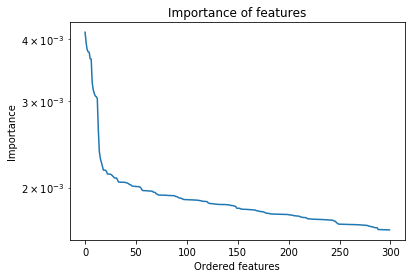

In [3]:
from data_generator import  train_test_split, generate_mapping, create_dataset
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

X_train, y_train, X_tst, y_tst = train_test_split(test_size=0.7, subsample=1, persistance=False)
print("The shape of the problem is {}".format(X_train.shape))

forest = RandomForestClassifier(n_estimators=15)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_tst)

error =  100*np.sum( y_pred != y_tst ) / len(y_tst)

print('And the error is ONLY {0:.2f} %!'.format(error))
result = np.sort(forest.feature_importances_)
result = result[::-1]
plt.semilogy(result[:300])
plt.title('Importance of features')
plt.xlabel('Ordered features')
plt.ylabel('Importance')


As you can barely see from the plot, there are some important features... but the order of magnitude is the same.
That classification took into account only a very very small portion of the dataset, but it's not so relevant. 

This data are just *well done* for the point of view of classification.
They have large portions of significant information, there are no translations or rotations.

**This is way it's very very simple to classify them!**

There is no need of Deep Learning at all (for this dataset).